# Part II - Prosper Loan Characteristics on Loan Amounts
## by Ben Pacheco

## Investigation Overview


> In this investigation, I wanted to look at the characteristics of loans from Prosper that could be used to predict how much a loan does a customer recieve. The main focus will be on loan amounts, borrower rate (interest rate), borrower APR, Credit Grades/Prosper Rating, and Loan Status.


## Dataset Overview

> The data consists of information regarding 113,937 loans, including loan amounts, interest rates, APR, loan status, borrower monthly income, and other important factors.

In [112]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [113]:
# load in the dataset into a pandas dataframe
# data-wrangling required for plot outputs
prosperloans = pd.read_csv('prosperLoanData.csv')

prosperloans['ProsperRating'] = prosperloans['ProsperRating (Alpha)']
cols = ['LoanOriginalAmount', 'LoanStatus', 'StatedMonthlyIncome', 'BorrowerRate', 'DebtToIncomeRatio', 'Term',
       'CreditGrade', 'ProsperRating', 'BorrowerAPR', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']
prosperloans = prosperloans[cols]

In [114]:
prosper_sub = prosperloans[prosperloans['BorrowerAPR'].notna() 
                           & prosperloans['CreditScoreRangeLower'].notna() 
                           & prosperloans['CreditScoreRangeUpper'].notna() 
                           & prosperloans['DebtToIncomeRatio'].notna()]

In [115]:
#converting to ordered categorical variable
ordinal_var_dict = {'CreditGrade': ['NC','HR','E','D','C', 'B', 'A', 'AA'],
                    'ProsperRating': ['HR','E','D','C', 'B', 'A', 'AA'],
                   'LoanStatus': ['Cancelled','FinalPaymentInProgress','Past Due','Defaulted','Chargedoff',
                                   'Completed', 'Current']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosper_sub[var] = prosper_sub[var].astype(ordered_var)

In [116]:
def splitString(string):
    return ''.join([x if x.islower() else f" {x}" for x in string])

def myHistPlot(df, xVar, interval, limit=1, figsize=[14,6]):
    bins = np.arange(df[xVar].min(), df[xVar].quantile(limit)+interval, interval)
    df[xVar].hist(bins = bins, grid = False, edgecolor = 'black', figsize = figsize);
    xVar = splitString(xVar)
    plt.title(f'Distribution of {xVar}{" - Data Excluded: "} {(1-limit):.0%}'.title(), fontsize = 14, weight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')
    

def myCountPlot(df, yVar, color = sb.color_palette()[0]):
    sb.countplot(data = df, y = yVar, color = color)
    yVar = splitString(yVar)
    plt.ylabel(yVar.title(), fontsize = 10, weight = 'bold')
    plt.xlabel('Frequency'.title(), fontsize = 10, weight = 'bold')

## Distribution of Loan Amounts

> Loan amounts have consistent rounded peaks of about 5k. Prosper prefers to lend an amount divisible by 5k.

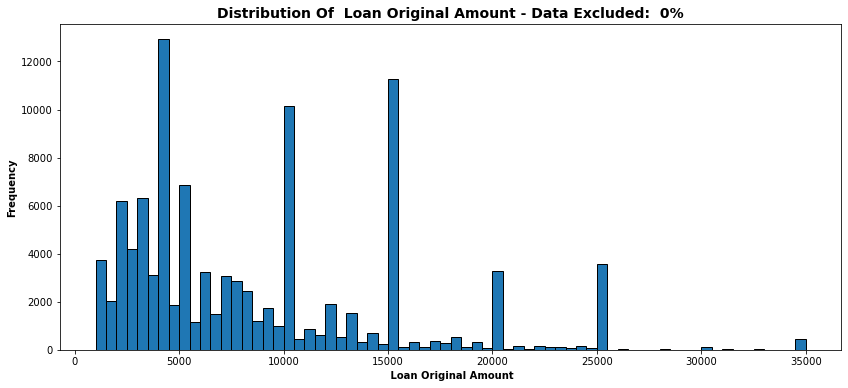

In [117]:
myHistPlot(prosper_sub, 'LoanOriginalAmount', 500);

## Distribution of Borrower APR

> APR or Annual Percentage Rate is a rate applied to a loan similar to what interest is. The distribution is very unimodal with a spike of about 0.17% APR, Prosper prefers to lend at this rate.

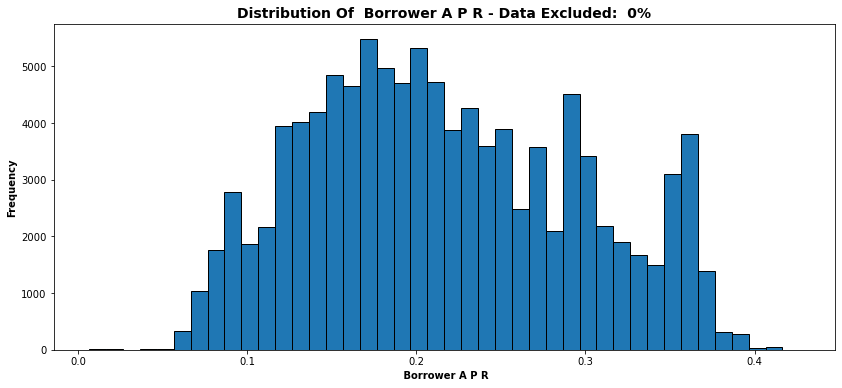

In [118]:
myHistPlot(prosper_sub, 'BorrowerAPR', 0.01);

## Distribution of Borrower Rate (Interest Rate)

> Interest rate is also tacked on to loans, Prosper tends to apply a 0.32% interest on a number of loans. The rates are very closely related.

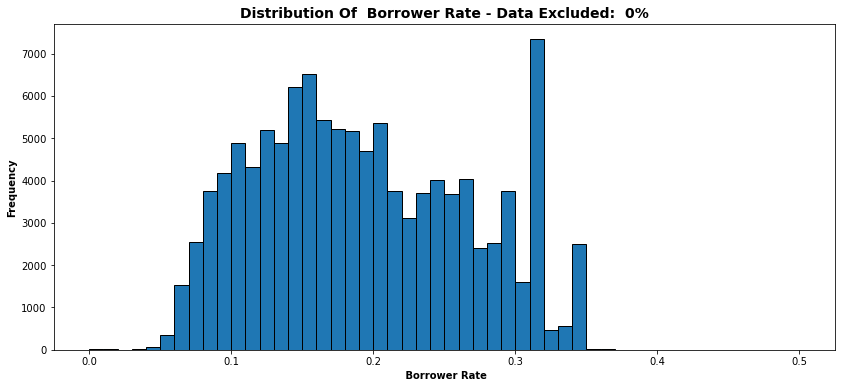

In [119]:
myHistPlot(prosperloans, 'BorrowerRate', 0.01);

## Loan Amounts vs. Rates

> As loan amounts drop the rate percentages go up which aligns with a credit/loan issuing company. Prosper trusts the customer that obtains a higher riskier amount of a loan therefore they don't need to apply high APR or interest rates because they expect to be paid back in full and on time.

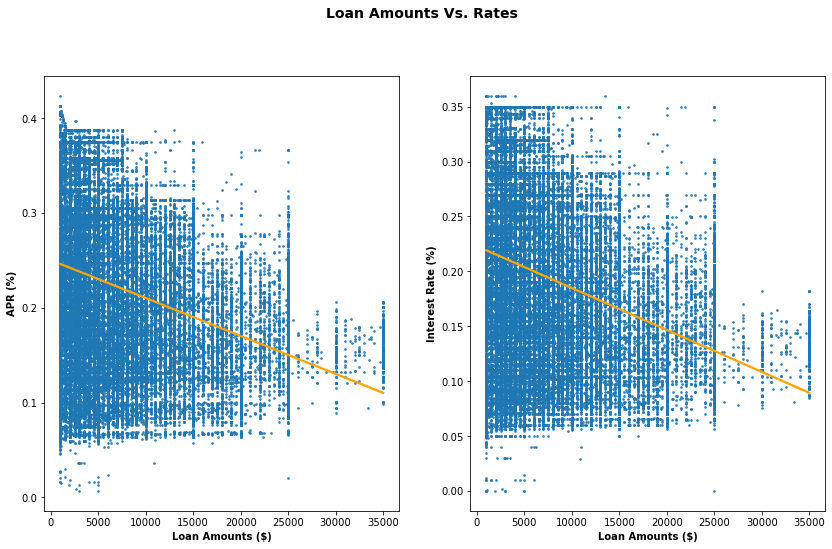

In [130]:
plt.figure(figsize = [14, 8])
plt.subplot(1, 2, 1)
sb.regplot(data = prosper_sub, x= 'LoanOriginalAmount', y= 'BorrowerAPR', scatter_kws={'s':3}, x_jitter=0.05,
               line_kws={'color':'orange'})
plt.ylabel('APR (%)', fontsize=10, weight='bold')
plt.xlabel('Loan Amounts ($)', fontsize=10, weight='bold')


plt.subplot(1, 2, 2)
sb.regplot(data = prosper_sub, x= 'LoanOriginalAmount', y= 'BorrowerRate', scatter_kws={'s':3}, x_jitter=0.05,
               line_kws={'color':'orange'})

plt.ylabel('Interest Rate (%)', fontsize=10, weight='bold')
plt.xlabel('Loan Amounts ($)', fontsize=10, weight='bold')

plt.suptitle('Loan amounts vs. Rates'.title(), y = 1, fontsize = 14, weight = 'bold');


## BorrowerAPR vs. BorrowerRate

> As explained in the previous slide, we observe here the direct relationship between the rates, that is as APR goes up so does the interest rates for any loan.

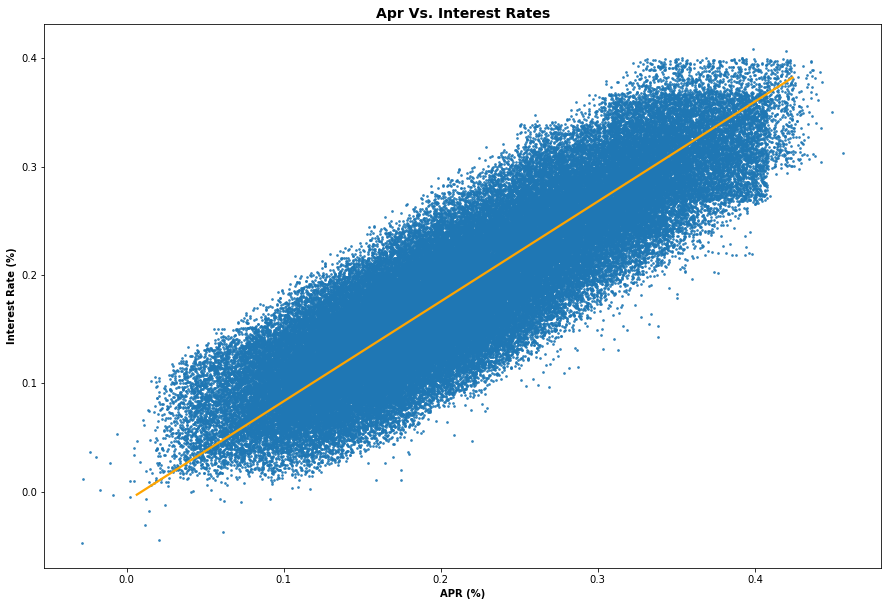

In [121]:
plt.figure(figsize = [15, 10])

sb.regplot(data = prosper_sub, y = 'BorrowerRate', x = 'BorrowerAPR', scatter_kws={'s':3}, x_jitter=0.05, y_jitter = 0.05,
          line_kws={'color':'orange'})
plt.xlabel('APR (%)', fontsize=10, weight='bold')
plt.ylabel('Interest Rate (%)', fontsize=10, weight = 'bold')
plt.title('APR vs. interest rates'.title(), y = 1, fontsize = 14, weight = 'bold');

## Loan Amounts vs. Loan Status, Credit Grades, Prosper Ratings

> Higher credit grades and ratings are assigned to customers more often when they take higher loan amounts. Customers are more likely to complete or currently own a loan from Prosper if they were given a high loan amount.

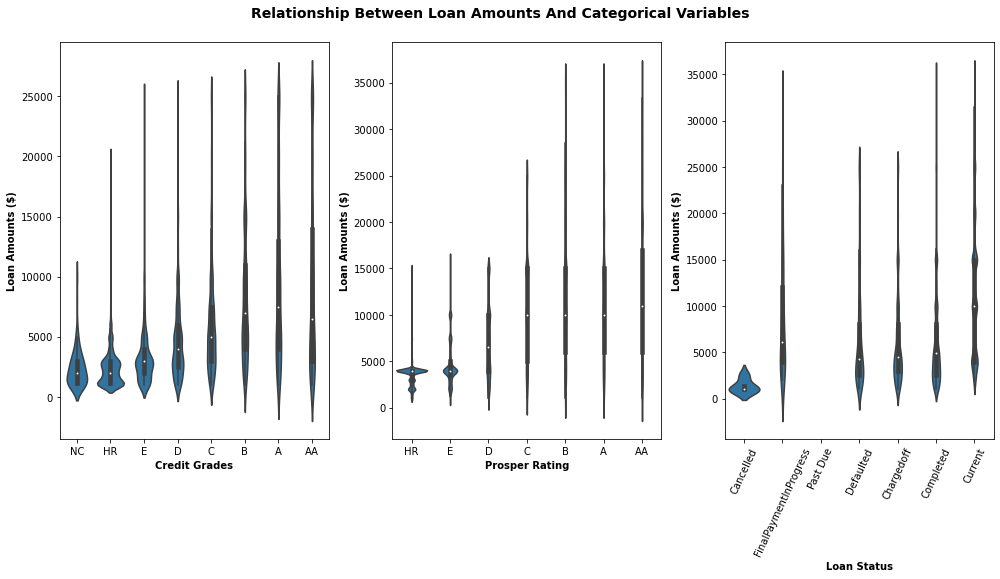

In [122]:
#loan amounts vs. credit grades, loan amounts vs. loan status

plt.figure(figsize = [14, 8])
base_color = sb.color_palette()[0]

plt.subplot(1, 3, 1)
sb.violinplot(data=prosper_sub, y='LoanOriginalAmount', x='CreditGrade', color=base_color, inner='box')
plt.xlabel('Credit Grades', fontsize=10, weight='bold')
plt.ylabel('Loan Amounts ($)', fontsize=10, weight='bold')


plt.subplot(1, 3, 2)
sb.violinplot(data=prosper_sub, y='LoanOriginalAmount', x='ProsperRating', color=base_color, inner='box')
plt.xlabel('Prosper Rating', fontsize=10, weight='bold')
plt.ylabel('Loan Amounts ($)', fontsize=10, weight='bold')


plt.subplot(1, 3, 3)
sb.violinplot(data=prosper_sub, y='LoanOriginalAmount', x='LoanStatus', color=base_color, inner='box')
plt.xticks(rotation=65)
plt.xlabel('Loan Status', fontsize=10, weight='bold')
plt.ylabel('Loan Amounts ($)', fontsize=10, weight='bold')

plt.suptitle('Relationship between loan amounts and categorical variables'.title(), y = 1, fontsize = 14, weight = 'bold');
plt.tight_layout();

## Loan Amounts and APR by Credit Grades

> For Prosper customers before 2009 that have no credit we see an upward slope, loan amounts increase and so does the APR. For grades HR to D the slope is negative so for these grades assigned as loan amounts increase APR decreases. Looking closely at the next grades as they increase in succession we can see a trend, as Prosper assigned a higher grade to the customer the slope gets less steep therefore higher grade assigned means the loan amount and rates will go up. This is interesting to see because we saw earlier in bivariate plots that loan amounts and the rates had a negative correlation.

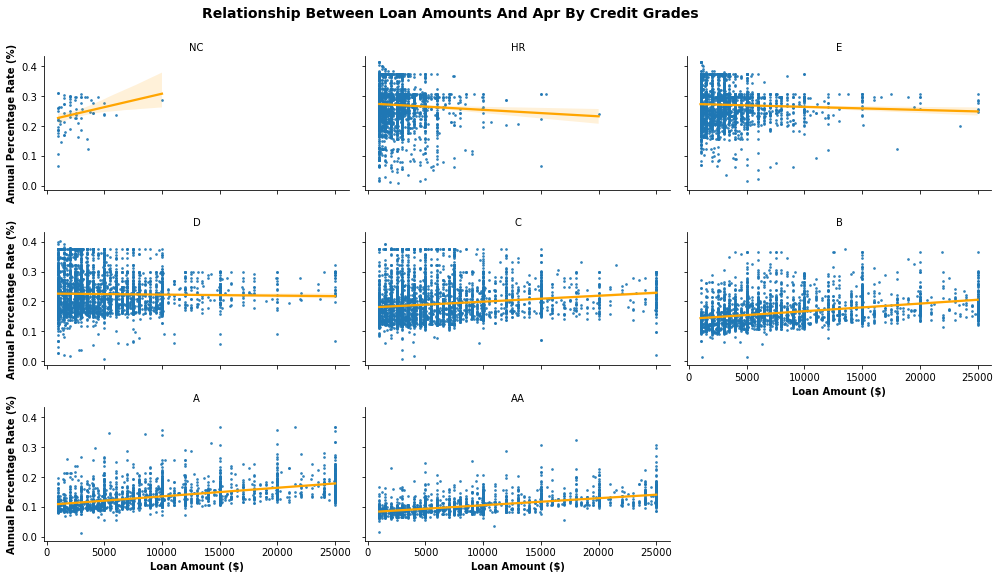

In [123]:
g=sb.FacetGrid(data=prosper_sub, aspect=1, height=5, col='CreditGrade', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'s':3}, 
      line_kws={'color':'orange'});
g.add_legend()
g.set_xlabels('Loan Amount ($)', fontsize=10, weight='bold')
g.set_ylabels('Annual Percentage Rate (%)', fontsize=10, weight='bold')
g.set_titles('{col_name}')
plt.suptitle('Relationship between loan amounts and APR by Credit Grades'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold')
g.fig.set_size_inches(14, 8)
plt.tight_layout();

## Loan Amounts and APR by Prosper Rating

> For Prosper customer post 2009 we see something interestingly different than Credit Grades. Ratings HR - B all have negative trends. Only ratings A - AA have positive trends.

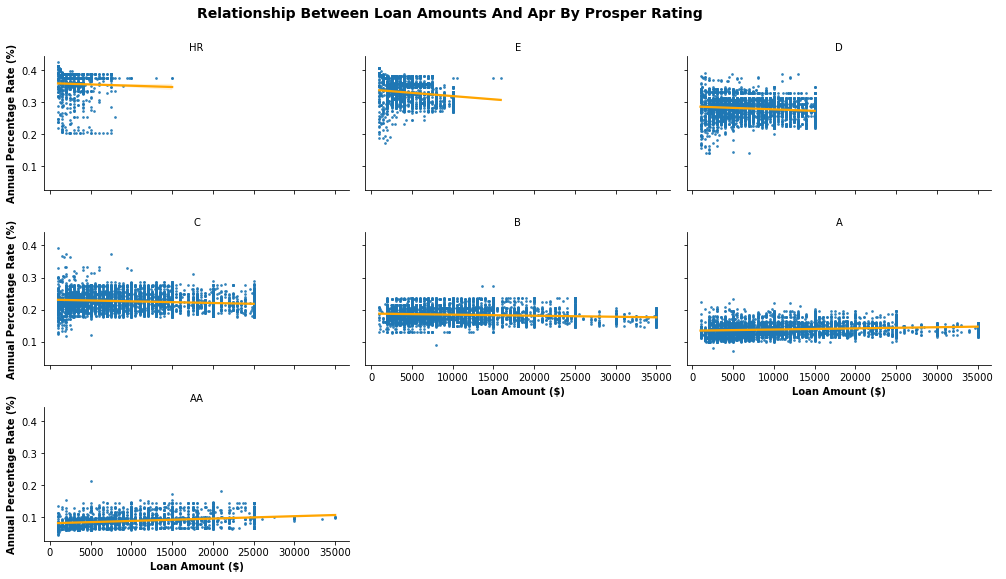

In [124]:
g=sb.FacetGrid(data=prosper_sub, aspect=1, height=5, col='ProsperRating', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'s':3}, 
      line_kws={'color':'orange'});
g.add_legend()
g.set_xlabels('Loan Amount ($)', fontsize=10, weight='bold')
g.set_ylabels('Annual Percentage Rate (%)', fontsize=10, weight='bold')
g.set_titles('{col_name}')
plt.suptitle('Relationship between loan amounts and APR by Prosper Rating'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold')
g.fig.set_size_inches(14, 8)
plt.tight_layout();

## Loan Amounts and Interest Rate by Term

> As expected for term 36 months our plot is very populated. As the months go by the slope of the fitted regression line gets less steeper. What this tells us is that as loans decrease in amounts the rates will increase the longer the loan amount is assigned to that loan. So a loan that last the full 5 years will see the most increase in rates the lower the loan amount.


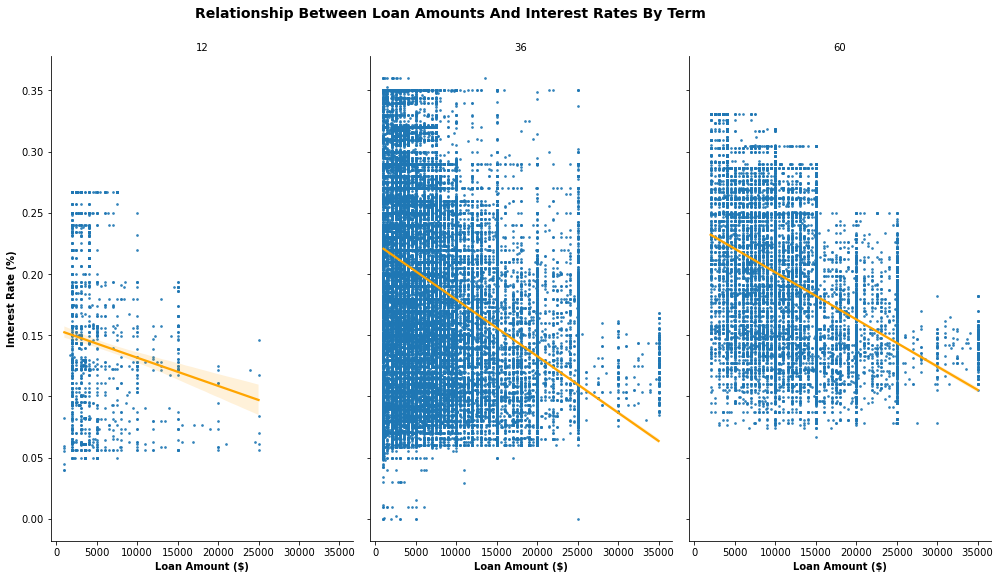

In [125]:
g=sb.FacetGrid(data=prosper_sub, aspect=1, height=5, col='Term', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.05, scatter_kws={'s':3}, 
      line_kws={'color':'orange'});
g.add_legend()
g.set_xlabels('Loan Amount ($)', fontsize=10, weight='bold')
g.set_ylabels('Interest Rate (%)', fontsize=10, weight='bold')
g.set_titles('{col_name}')
plt.suptitle('Relationship between loan amounts and interest rates by term'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold')
g.fig.set_size_inches(14, 8)
plt.tight_layout();

## Loan Amounts and Credit Grades by Loan Status

> When Loan status and credit grade increase it is common for a loan to be past due - charged off which doesn't align with the early findings of Loan Status in the bivariate plot. 

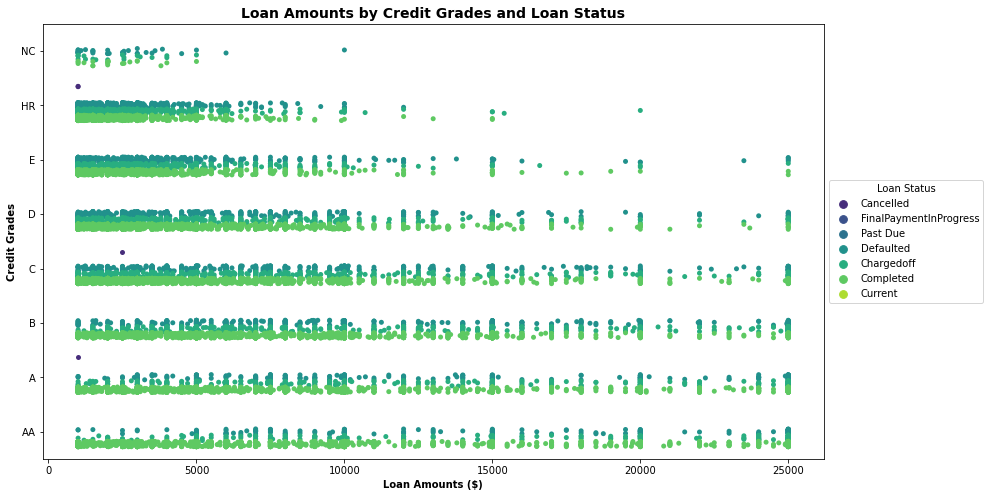

In [126]:
plt.figure(figsize=(14, 8))
ax = sb.stripplot(data=prosper_sub, y='CreditGrade', x= 'LoanOriginalAmount', hue='LoanStatus',
                  jitter=0.35, dodge=0.4, palette= "viridis");
plt.xlabel('Loan Amounts ($)', fontsize=10, weight='bold')
plt.ylabel('Credit Grades', fontsize=10, weight='bold')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), title='Loan Status')
plt.title('Loan Amounts by Credit Grades and Loan Status', fontsize=14, weight='bold');

## Loan Amounts and Prosper Rating by Term

> For loans given post 2009 we see that for each term as loan amounts increase so does the rating Prosper gives to its customers.

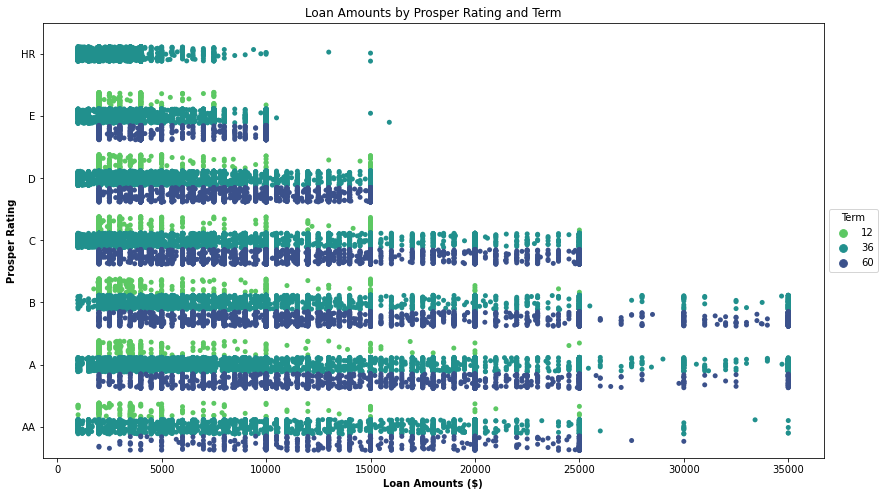

In [127]:
plt.figure(figsize=(14, 8))
ax = sb.stripplot(data=prosper_sub, y='ProsperRating', x= 'LoanOriginalAmount', hue='Term',
                  jitter = 0.35, dodge=0.4, palette= "viridis_r");
plt.xlabel('Loan Amounts ($)', fontsize=10, weight='bold')
plt.ylabel('Prosper Rating', fontsize=10, weight='bold')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), title='Term')
plt.title('Loan Amounts by Prosper Rating and Term');

In [131]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 1906324 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\Udacity\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_note